In [ ]:
#This notebook was prepared by Prisha Jain

In [1]:
#opening the .fits file
from astropy.io import fits
data1 = fits.open(r"C:\Users\prish\Downloads\emm_emu_l2a_20220209t110218_0170_os2_sw2of2_r_v01-06.fits.gz")
data2 = fits.open(r"C:\Users\prish\Downloads\emm_emu_l2a_20220202t145424_0167_os2_sw1of2_r_v01-05.fits.gz")
data3 = fits.open(r"C:\Users\prish\Downloads\emm_emu_l2a_20220202t222051_0168_os2_sw2of3_r_v01-05.fits.gz")
data4 = fits.open(r"C:\Users\prish\Downloads\emm_emu_l2a_20220202t042720_0167_os2_sw2of2_r_v01-05.fits.gz")
data5 = fits.open(r"C:\Users\prish\Downloads\emm_emu_l2a_20211120t035128_0136_os2_sw1of3_r_v01-07.fits.gz")

In [2]:
def integrate_brightness(wavelength, radiance, line_range):
# figure out which spectral bins are in the wavelength range
    spectral_pos = np.logical_and(line_range[0] < wavelength, wavelength <line_range[1])
    spectral_pos = np.where(spectral_pos)
# figure our how wide the spectral bins are
    wavelength_diff = np.diff(wavelength)
# figure out the contribution in R from each spectral bin and add it up
    return np.nansum(radiance[spectral_pos]*wavelength_diff[spectral_pos]) # R/nm * nm = R

In [3]:
test_spa = 45
test_int1 = data1['CAL'].data['CORRECTED_CNTS'].shape[0]//2
test_int2 = data2['CAL'].data['CORRECTED_CNTS'].shape[0]//2
test_int3 = data3['CAL'].data['CORRECTED_CNTS'].shape[0]//2
test_int4 = data4['CAL'].data['CORRECTED_CNTS'].shape[0]//2
test_int5 = data5['CAL'].data['CORRECTED_CNTS'].shape[0]//2

In [4]:
import numpy as np

In [75]:
test_observation_image1 = np.zeros(data1['CAL'].data['RADIANCE'].shape[:2])
for i_int in range(data1['CAL'].data['RADIANCE'].shape[0]):
    for i_spa in range(data1['CAL'].data['RADIANCE'].shape[1]):
        test_observation_image1[i_int, i_spa] =integrate_brightness(data1['WAVELENGTH'].data['WAVELENGTH_L2A'][0, i_spa],data1['CAL'].data['RADIANCE'][i_int, i_spa],[120-2.0,120+2.0])

In [76]:
test_observation_image2 = np.zeros(data2['CAL'].data['RADIANCE'].shape[:2])
for i_int in range(data2['CAL'].data['RADIANCE'].shape[0]):
    for i_spa in range(data2['CAL'].data['RADIANCE'].shape[1]):
        test_observation_image2[i_int, i_spa] =integrate_brightness(data2['WAVELENGTH'].data['WAVELENGTH_L2A'][0, i_spa],data2['CAL'].data['RADIANCE'][i_int, i_spa],[120-2.0,120+2.0])

In [77]:
test_observation_image3 = np.zeros(data3['CAL'].data['RADIANCE'].shape[:2])
for i_int in range(data3['CAL'].data['RADIANCE'].shape[0]):
    for i_spa in range(data3['CAL'].data['RADIANCE'].shape[1]):
        test_observation_image3[i_int, i_spa] =integrate_brightness(data3['WAVELENGTH'].data['WAVELENGTH_L2A'][0, i_spa],data3['CAL'].data['RADIANCE'][i_int, i_spa],[120-2.0,120+2.0])

In [78]:
test_observation_image4 = np.zeros(data4['CAL'].data['RADIANCE'].shape[:2])
for i_int in range(data4['CAL'].data['RADIANCE'].shape[0]):
    for i_spa in range(data4['CAL'].data['RADIANCE'].shape[1]):
        test_observation_image4[i_int, i_spa] =integrate_brightness(data4['WAVELENGTH'].data['WAVELENGTH_L2A'][0, i_spa],data4['CAL'].data['RADIANCE'][i_int, i_spa],[120-2.0,120+2.0])

In [79]:
test_observation_image5 = np.zeros(data5['CAL'].data['RADIANCE'].shape[:2])
for i_int in range(data5['CAL'].data['RADIANCE'].shape[0]):
    for i_spa in range(data5['CAL'].data['RADIANCE'].shape[1]):
        test_observation_image5[i_int, i_spa] =integrate_brightness(data5['WAVELENGTH'].data['WAVELENGTH_L2A'][0, i_spa],data5['CAL'].data['RADIANCE'][i_int, i_spa],[120-2.0,120+2.0])

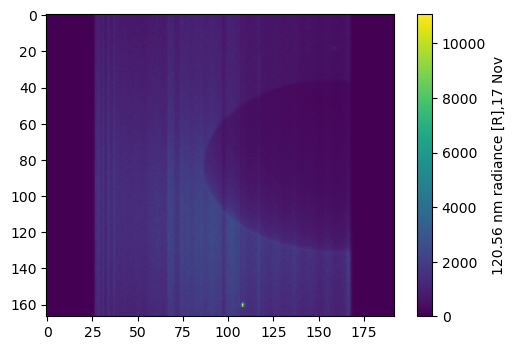

In [80]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, dpi=100)
img1 = ax.imshow(test_observation_image1)
cbar = plt.colorbar(img1)
cbar.set_label('120.56 nm radiance [R],17 Nov')

(167, 112)

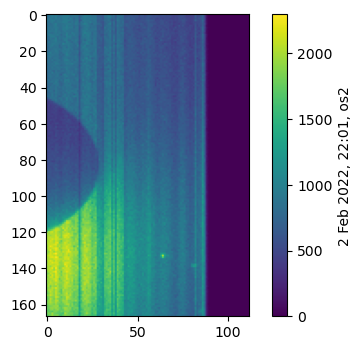

In [140]:
fig, ax = plt.subplots(1, dpi=100)
img2 = ax.imshow(test_observation_image2)
cbar = plt.colorbar(img2)
cbar.set_label('2 Feb 2022, 22:01, os2')
test_observation_image2.shape

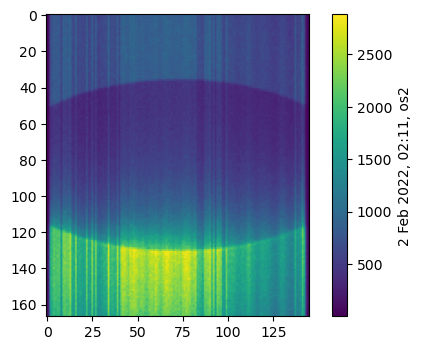

In [116]:
fig, ax = plt.subplots(1, dpi=100)
img3 = ax.imshow(test_observation_image3)
cbar = plt.colorbar(img3)
cbar.set_label('2 Feb 2022, 02:11, os2')

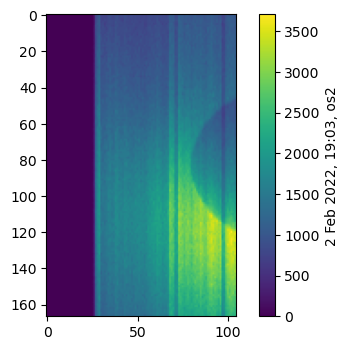

In [111]:
fig, ax = plt.subplots(1, dpi=100)
img4 = ax.imshow(test_observation_image4)
cbar = plt.colorbar(img4)
cbar.set_label('2 Feb 2022, 19:03, os2')

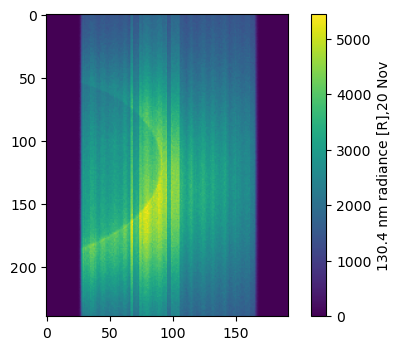

In [84]:
fig, ax = plt.subplots(1, dpi=100)
img5 = ax.imshow(test_observation_image5)
cbar = plt.colorbar(img5)
cbar.set_label('130.4 nm radiance [R],20 Nov')

In [98]:
#cut the extra portion of all the images using the follwoing line of code for different images. You will have to do this multiple times and depending on the file you select, since different files have data in different dimensions.
test_observation_image4 = np.delete(test_observation_image4, np.s_[0:15], 1) 

In [ ]:
#resize all images so that they have same size along the first dimension
from skimage.transform import resize
test_observation_image4=resize(test_observation_image4,(167,105))
test_observation_image3=resize(test_observation_image3,(167,145))
test_observation_image2=resize(test_observation_image2,(167,162))

In [117]:
#check shapes of all images to ensure they have shapes so that the first dimension is same for all of them
test_observation_image3.shape

(167, 145)

In [112]:
test_observation_image4.shape

(167, 105)

In [122]:
test_observation_image2.shape

(167, 162)

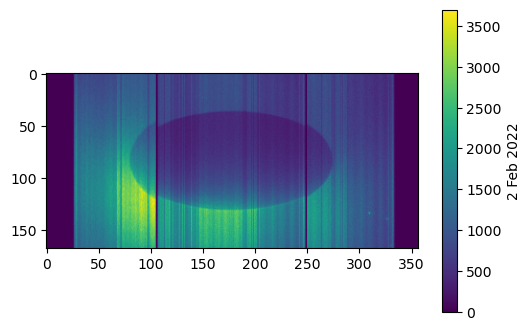

In [147]:
#stacking the images together horizontally
arr1=np.hstack((test_observation_image4, test_observation_image3,test_observation_image2))
fig, ax = plt.subplots(1, dpi=100)
img = ax.imshow(arr1)
cbar = plt.colorbar(img)
cbar.set_label('2 Feb 2022')